In [1]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph , END,START
from typing import TypedDict
from dotenv import load_dotenv

In [ ]:
load_dotenv()

In [2]:
model =  ChatOpenAI(
    model="gpt-4o-mini",   # you can also use e.g. "aAnthropic/claude-3.5-sonnet"
    temperature=0.7
) 

In [4]:
class chain_state(TypedDict):

    topic:str
    gen_outline:str
    gen_blog:str

In [6]:
def gen_outline(state : chain_state) -> chain_state:

    topic =state["topic"]

    prompt=f'write a outline on the {topic}'

    outline_result=model.invoke(prompt).content

    state["gen_outline"]=outline_result

    return state

In [7]:
def gen_blog(state : chain_state) -> chain_state:

    outline=state["gen_outline"]

    prompt=f"write a blog on the given {outline}"

    blog_result=model.invoke(prompt).content

    state["gen_blog"]=blog_result

    return state 


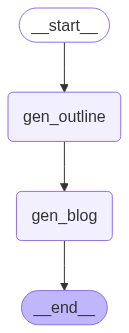

In [8]:
graph=StateGraph(chain_state)

graph.add_node("gen_outline",gen_outline)
graph.add_node("gen_blog",gen_blog)

graph.add_edge(START,"gen_outline")
graph.add_edge("gen_outline","gen_blog")
graph.add_edge("gen_blog",END)


graph.compile()

In [12]:
workflow=graph.compile()

result=workflow.invoke({"topic":"starwar"})

print(result)

{'topic': 'starwar', 'gen_outline': 'Sure! Here’s an outline for a comprehensive overview of the Star Wars franchise, covering its key elements, themes, and impact.\n\n### Outline for Star Wars\n\n#### I. Introduction\n   A. Overview of Star Wars\n      1. Creation and development by George Lucas\n      2. Initial release of "Star Wars: Episode IV - A New Hope" in 1977\n      3. Cultural significance and legacy\n\n#### II. The Star Wars Universe\n   A. Setting and Geography\n      1. Galaxy far, far away\n      2. Key planets (e.g., Tatooine, Coruscant, Hoth, Endor)\n   B. Species and Characters\n      1. Diverse alien species (e.g., Wookiees, Twi\'leks, Rodians)\n      2. Iconic characters (e.g., Luke Skywalker, Darth Vader, Princess Leia)\n\n#### III. The Jedi and the Sith\n   A. The Force\n      1. Explanation of the Force\n      2. Light Side vs. Dark Side\n   B. Jedi Order\n      1. Principles and training of Jedi\n      2. Prominent Jedi (e.g., Obi-Wan Kenobi, Yoda, Rey)\n   C. S